In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE_clean.csv")

#### Show Top 5 Records

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,2012-06-05


#### Shape of the dataset

In [13]:
df.shape

(244, 16)

#### Summary of the dataset

In [14]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


####  Check Datatypes in the dataset

In [15]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
 15  date         244 non-null    object 
dtypes: float64(7), int64(7), object(2)
memory usage: 30.6+ KB


In [16]:
df["date"]=pd.to_datetime(df["date"])

### EXPLORING DATA

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'date']

We have 1 categorical features : ['Classes']


In [18]:
#removing 'day', 'month', 'year' and 'date' from numerical_col list as they are datetime data
numeric_features.remove('day')
numeric_features.remove('month')
numeric_features.remove('year')
numeric_features.remove('date')

## Feature Information 

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- ***Weather data observations***
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
- ***FWI Components***
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 0.7 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, for Bejaia Region  we will assign 1 and for Sidi-Bel Abbes Region we will give 0

In [19]:
# proportion of count data on categorical columns
for col in categorical_features:
    print("feature--->",col,"Total categories-->",len(df[col].value_counts()))
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

feature---> Classes Total categories--> 2
fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64
---------------------------


## Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

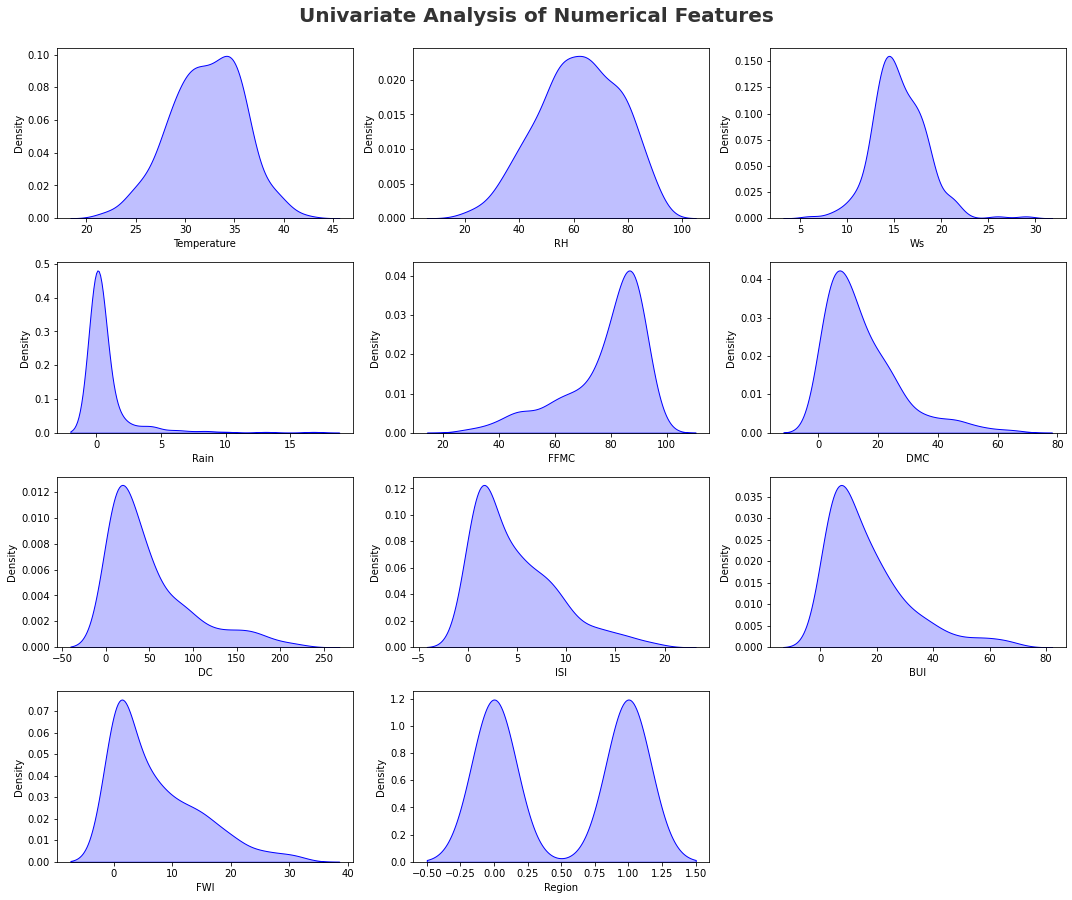

In [20]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

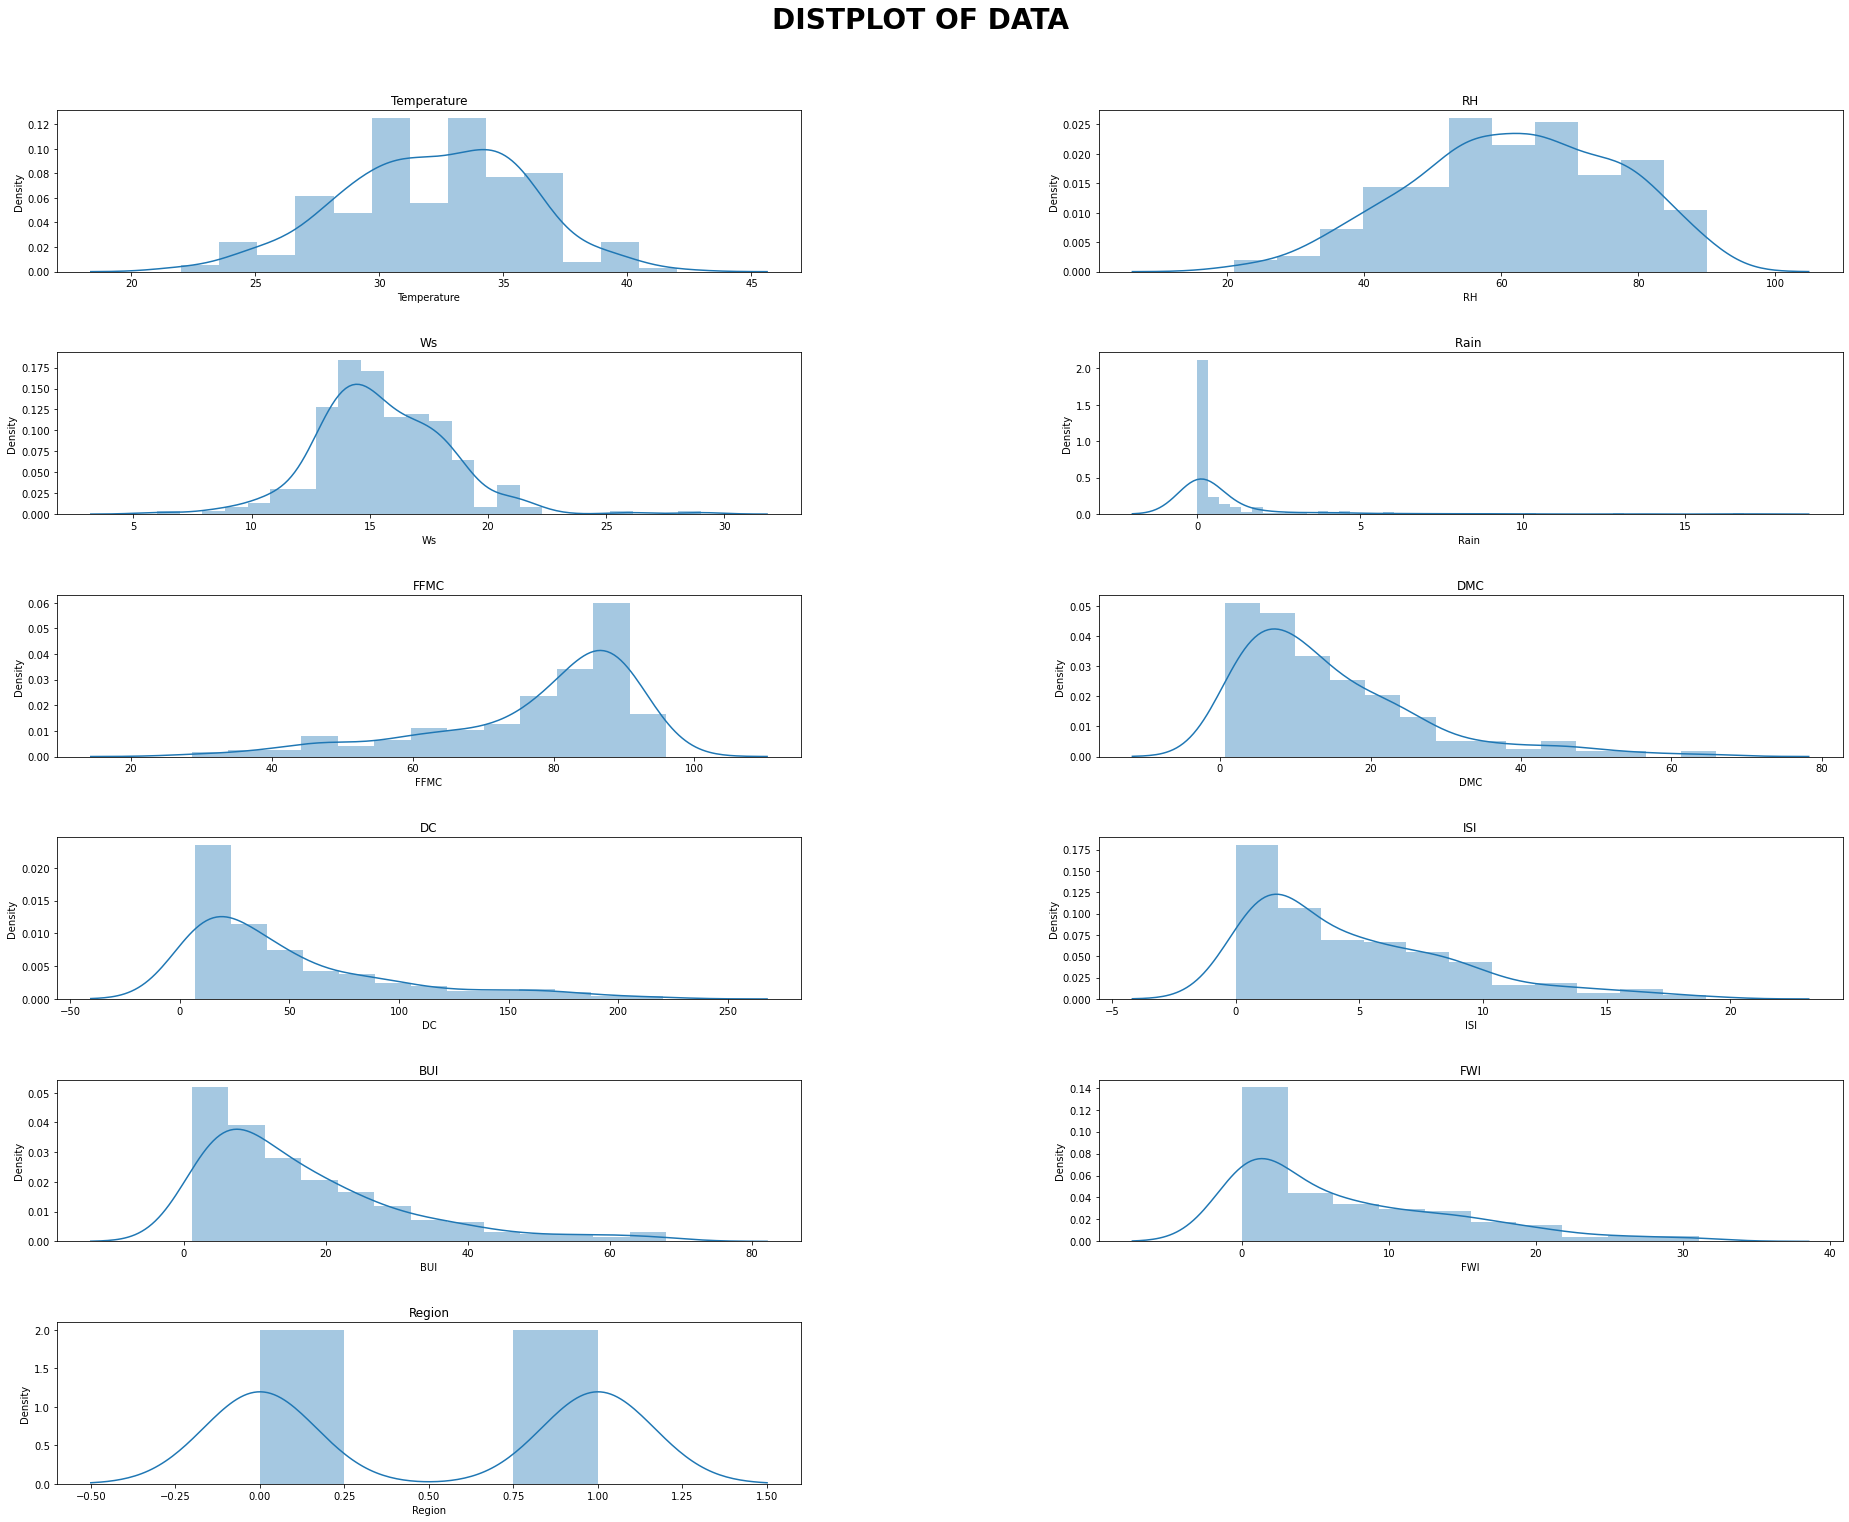

In [21]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_features):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.distplot(df[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

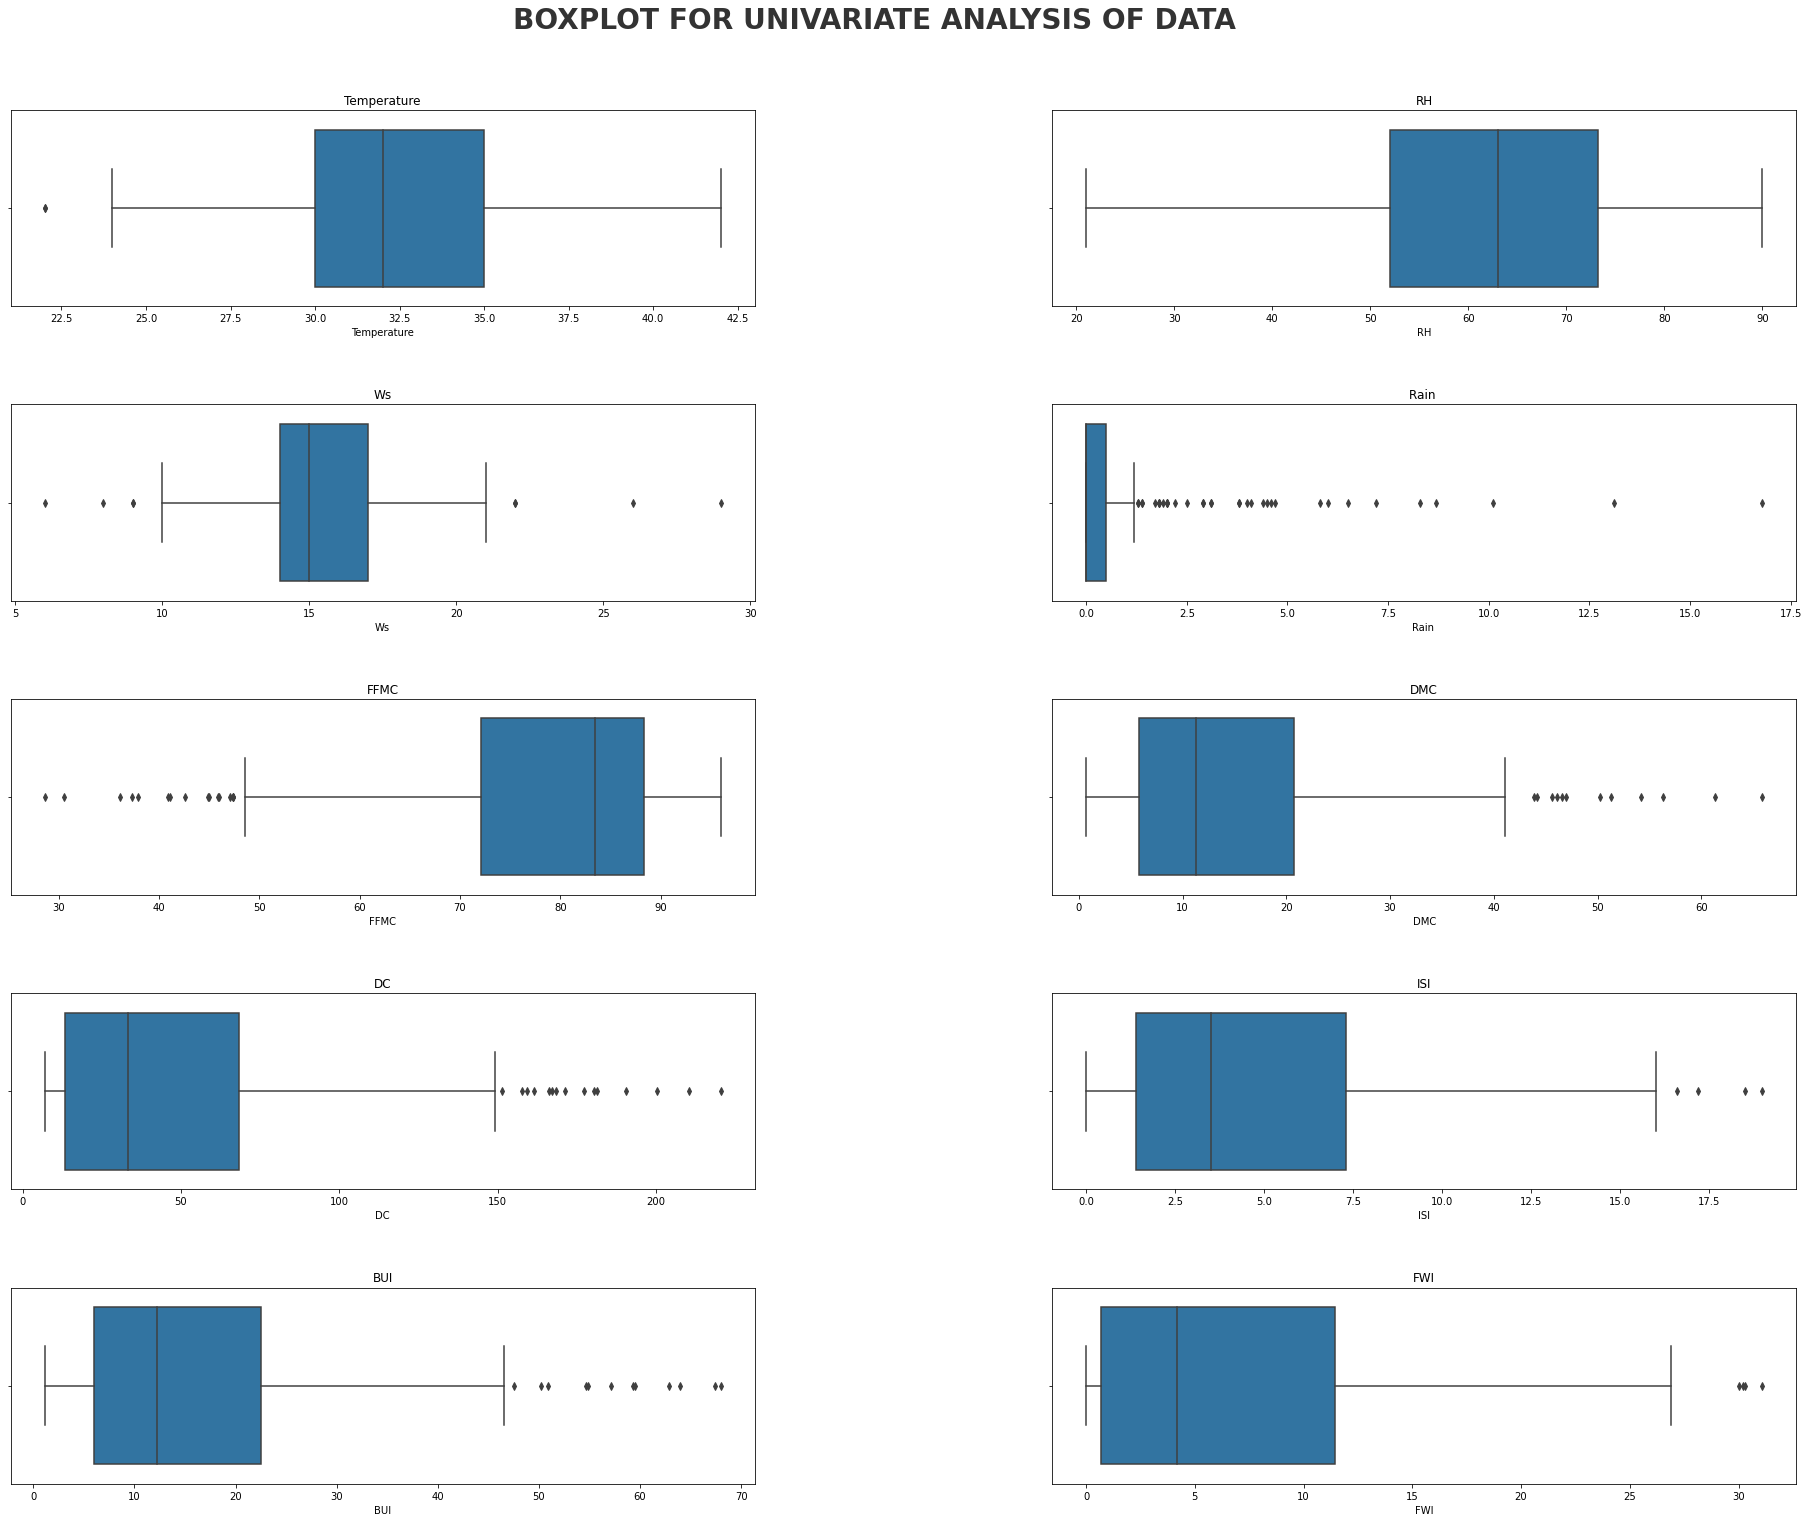

In [22]:
features =['Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data = df, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

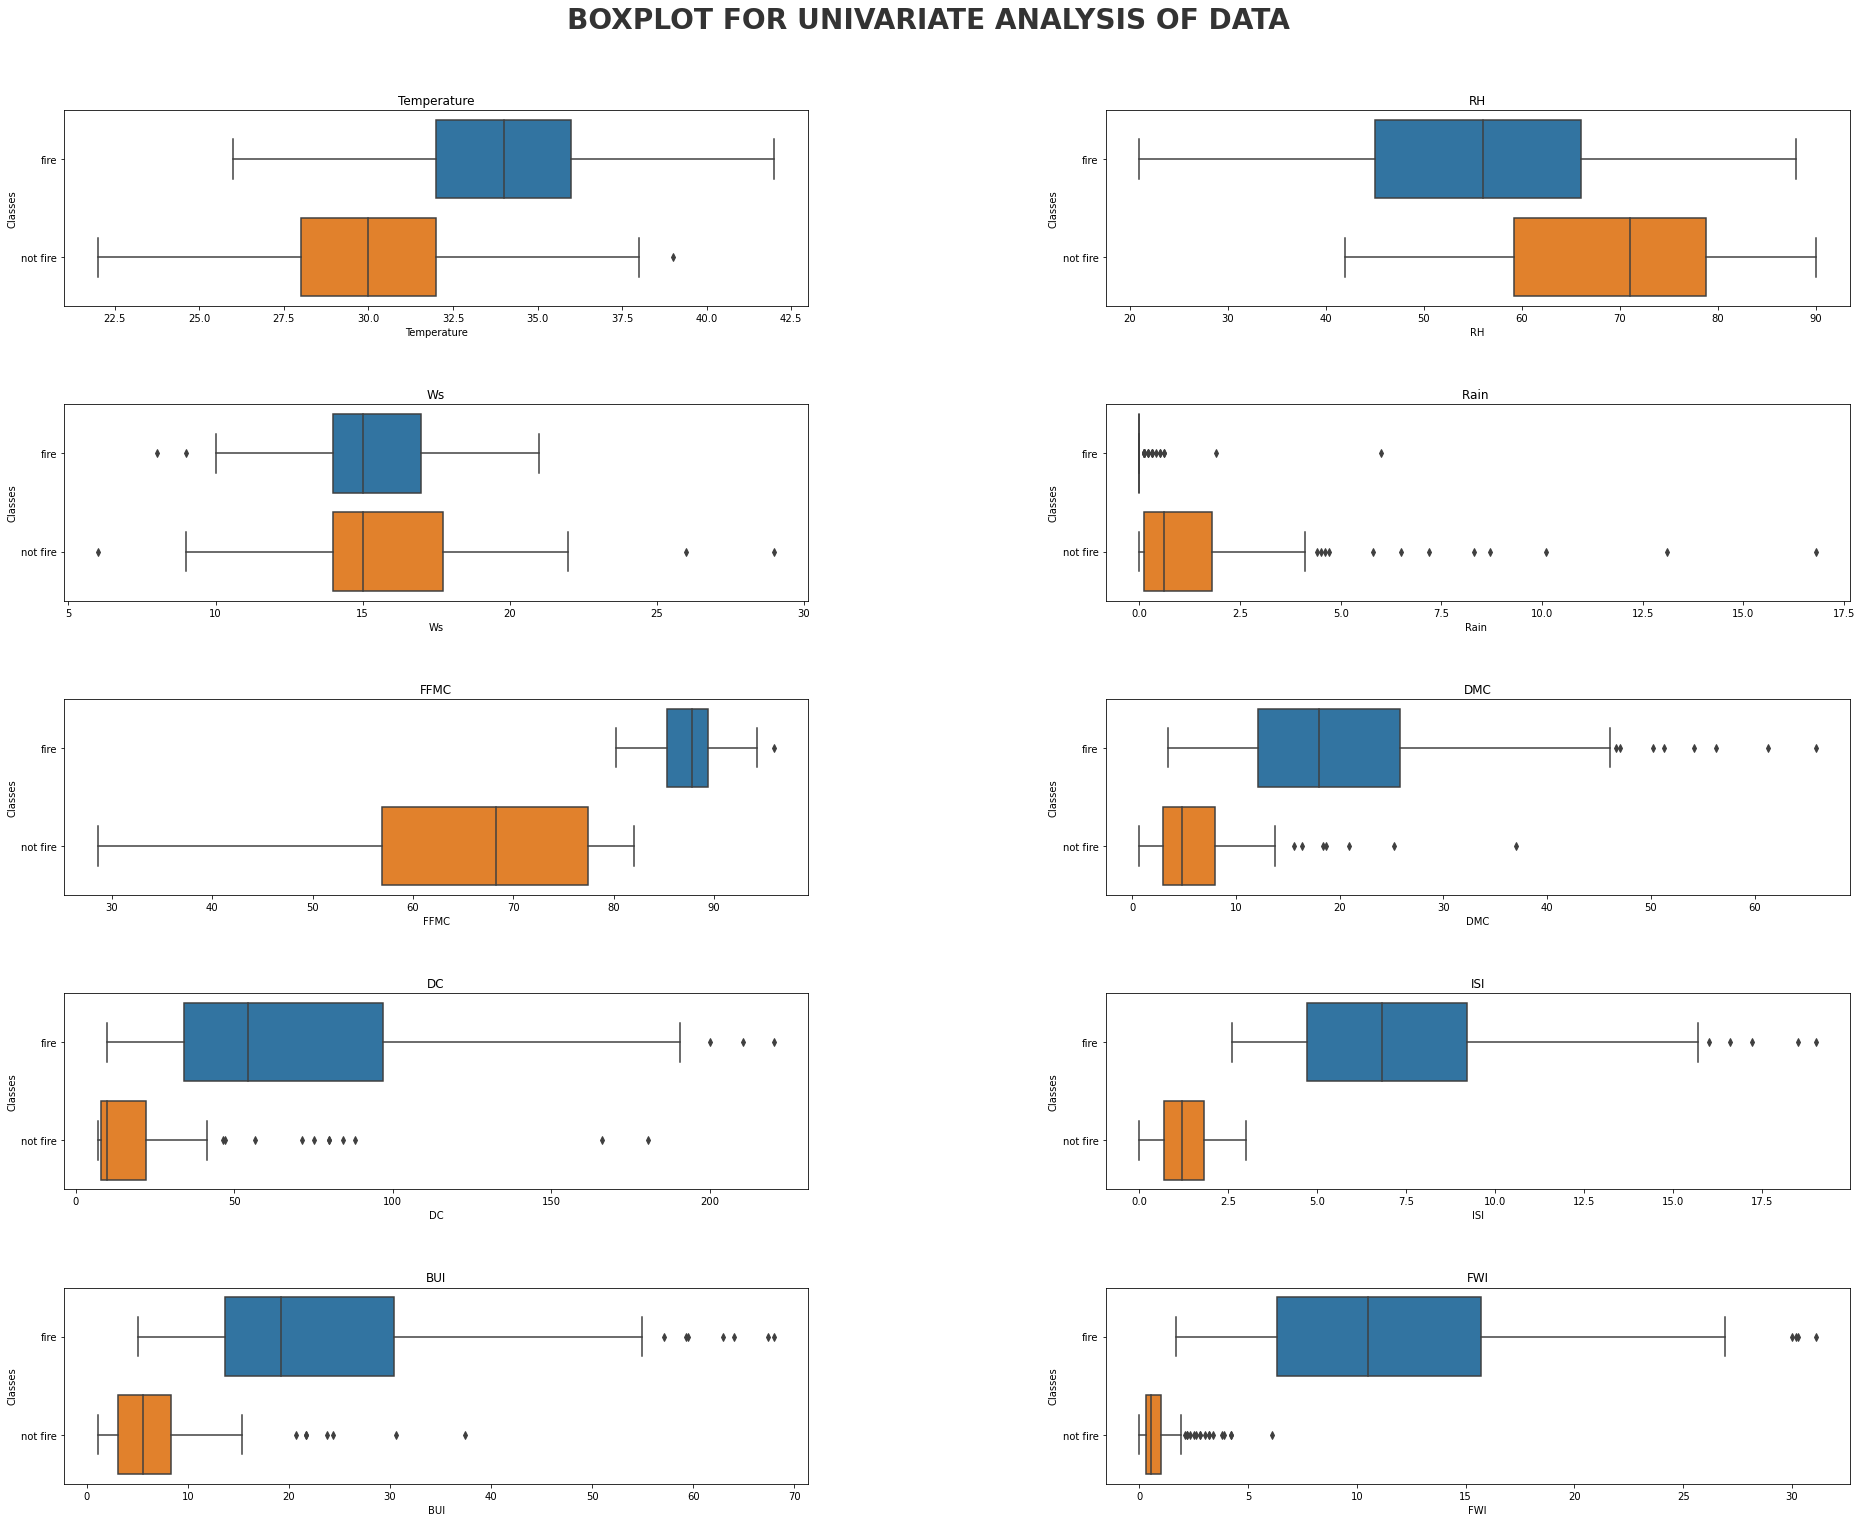

In [23]:
features =['Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data = df, x=col,y = df['Classes'].astype('category'));
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

#### Report
- rain,DMC,DC,ISI,BUI,FWI -right skewed  FFMC - left skewed (therefore outliers are present )
- region show 2 peak  . because there are two regions
- temperature ,RH,WS are similar to normal distribution
- rain have to much outliers that means it is not good predictor  for the target


### Categorical Features

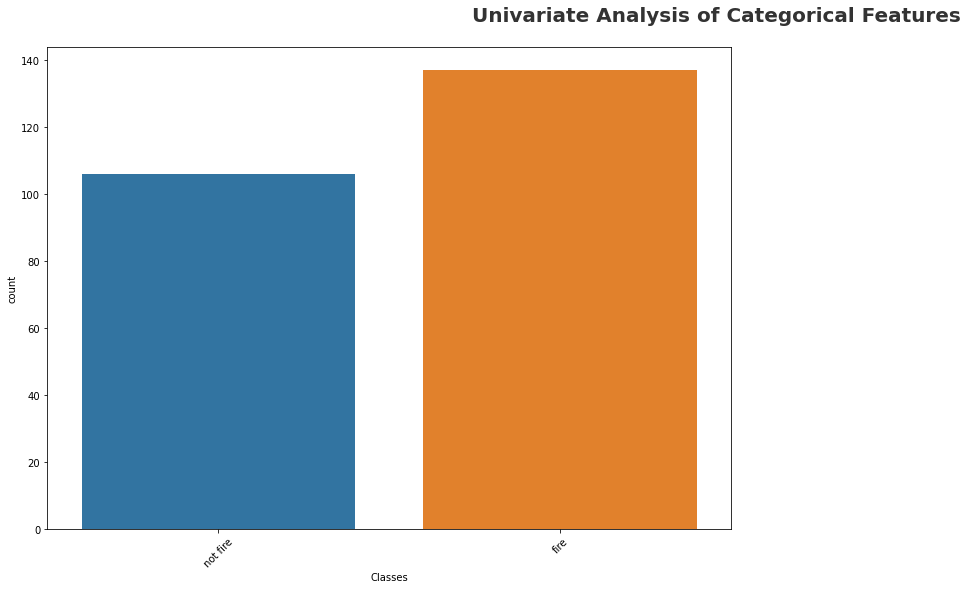

In [24]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Report
- there are two categories in classes 

### Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

In [25]:
df[(list(df.columns)[1:])].corr()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
month,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.082639,6.718556e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670,-2.734961e-01
RH,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957,4.064239e-01
Ws,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368,1.768290e-01
Rain,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422,4.108006e-02
FFMC,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132,-2.246798e-01
DMC,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864,-1.910937e-01
DC,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521,8.148217e-02
ISI,6.168011e-02,NaN,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.922895,-2.684206e-01


- year is not correlated to any other feature

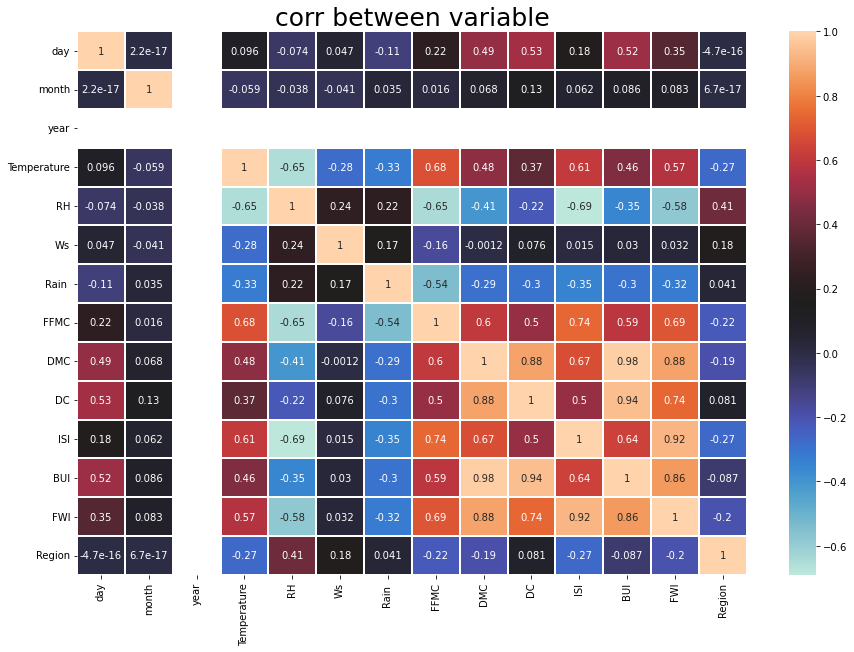

In [26]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

### highly correlated 
- ***(+ corr)*** --- (more than 60 percent)
- DMC and DC
- DMC and BUI  - 98 ( we can dop one of them)
- DMC and FWI
- DC and FWI
- BUI and FWI
- FWI and FFMC 
- FWI and DC 
- ISI and FFMC
- BUI and ISI -
- Temperature and FFMC  

- ***(- corr)***  ----   (less than 60 percent)
- temperature and RH
- RH and FFMC
- RH and ISI


- note : year have no corelation we can drop that column

In [27]:
df=df.drop("year",axis=1)

#### One Way F-test(Anova) :-

It tell whether two or more groups are similar or not. Based on their mean similarity and f-score.

In [28]:
One_Way_F_test = []
df_anova = df
features =['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'date']
grps = pd.unique(df_anova.Classes.values)
for feature in features:
    d_data = {grp:df_anova[feature][df_anova.Classes == grp] for grp in grps}
    F, p = stats.f_oneway(d_data['fire'], d_data['not fire'])
    if p<0.05:
        One_Way_F_test.append("reject null hypothesis")
    else:
        One_Way_F_test.append("accept null hypothesis")

result = pd.DataFrame(data=[features, One_Way_F_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,day,reject null hypothesis
1,month,accept null hypothesis
2,Temperature,reject null hypothesis
3,RH,reject null hypothesis
4,Ws,accept null hypothesis
5,Rain,reject null hypothesis
6,FFMC,reject null hypothesis
7,DMC,reject null hypothesis
8,DC,reject null hypothesis
9,ISI,reject null hypothesis


### Checking Null Values

In [29]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
date           0
dtype: int64

### Segment Categorical features by the target classes

In [30]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,2012-06-01
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,2012-06-02
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,2012-06-03
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,2012-06-04
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,2012-06-05


In [31]:
df["Temperature"].unique()

array([29, 26, 25, 27, 31, 33, 30, 28, 32, 34, 35, 36, 37, 22, 24, 38, 39,
       40, 42], dtype=int64)

In [32]:
feature_to_segment=["month","Region"]

In [33]:
for col in feature_to_segment:
    if df[col].nunique() <=4:
        display(pd.crosstab(df['Classes'], df[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

month,6,7,8,9
Classes,,,,
fire,0.182482,0.277372,0.372263,0.167883
not fire,0.330189,0.216981,0.103774,0.349057


Region,0,1
Classes,,
fire,0.569343,0.430657
not fire,0.405660,0.594340


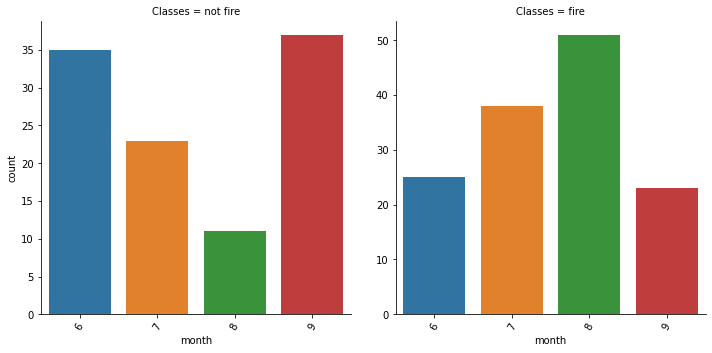

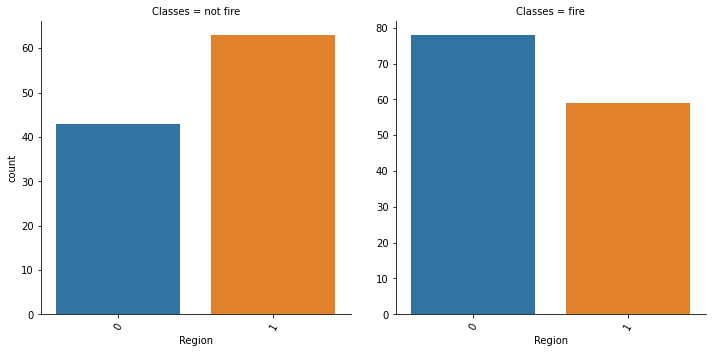

In [34]:
for col in feature_to_segment:
    if df[col].nunique() <= 4:
        g = sns.catplot(x = col, kind='count', col = 'Classes', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

#### Report

- In month 8 there are more chances of fire
- month 5 and  6 have less chance of fire
- Bejaia Region  1  have less chance of fire where as  Sidi-Bel Abbes Region  0 have more  chances of fire

###  Group numeric features by categorical features.

In [35]:
df[numeric_features].columns

Index(['Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region'],
      dtype='object')

We will use the DataFrame’s .groupby() function to group our data into categories and observe how the numeric features are distributed by calculating a metric such as mean, median, and standard deviation across the classes. The metric we will use is mean.

In [36]:
for col in feature_to_segment:
    if df[col].nunique() <= 4:
        display(df.groupby(col)[['Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region','Classes']].mean())


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
month,,,,,,,,,,,
6,30.800000,65.283333,15.333333,0.975000,72.366667,9.305000,27.301667,3.265000,10.295000,4.013333,0.5
7,33.048387,62.290323,16.096774,0.451613,81.270968,15.238710,46.240161,4.938710,16.874194,7.021311,0.5
8,35.338710,53.983871,15.322581,0.448387,86.175806,25.450000,92.698387,7.703226,29.420968,13.161290,0.5
9,29.366667,66.450000,15.250000,1.188333,71.348333,8.321667,29.568333,3.086667,9.636667,3.741667,0.5


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Region,,,,,,,,,,,
0,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.416311,5.892623,17.903279,8.504959,0.0
1,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869,1.0
